# Loading Data for XRD-COD

This tutorial shows the structure of XRD-COD and how to load the data in a simple way.

## Dataset Structure

XRD-COD is organized in two folders: 'Structures' and 'Powder_images'. Inside the 'Structures' folder there are JSON files with the information of each crystalline structure. On the other hand, the 'Powder_images' folder contains the PNG simulated radial images associated with each structure. The organization of the folders and files is detailed in the following image. 


![](Diagrama.jpeg)

Each JSON file contains a dictionary associated with a crystal structure. The dictionary keys are 'ID', 'space_group', 'alpha', 'beta', 'gamma', 'a', 'b', 'c', 'atoms' and 'intensities'. It is important to note that the 'ID' key contains the identifier of both the structure ('ID.json') and the radial image ('ID.png') of the same crystalline compound. The 'space_group' key cointain the space group information, and the 'alpha', 'beta', 'gamma', 'a', 'b' and 'c' keys contain the cell parameters. The 'atoms' key contains the atom types, coordinates and occupancy information. Finally, the 'intensities' key contains the simulated powder diffractogram associated with the structure. 

## File Download

To use the dataset, first download the 'Data' folder. After downloading, the 'Structures' and 'Powder_images' folders inside 'Data' have to be unzipped. 

**Caution:** It is likely that additional 'Structures' and 'Powder_images' folders will be created when unzipping. If this is the case, these additional folders should be deleted so that the file structure shown in the image in the previous section is complied with. Once this process is completed, you can proceed to load the data. 

**Important:** This file (the tutorial file) must be in the same location as the 'Data' folder.

## Loading of Crystal Structures

First, import the required python libraries.

In [1]:
import os
import glob
import json
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

Let's start by generating a list of the paths associated with all the structures.

In [2]:
structures_paths = glob.glob(os.path.join('Data', 'Structures', '*.json'))
len(structures_paths)

467861

The list contains approximately 500 thousand paths of all crystal structures in the dataset. Let's load a crystal structure to see its content. 

In [3]:
structure_path = structures_paths[0]
file = open(structure_path)
structure = json.load(file)

Let's see the ID, the cell parameters and the space group of this structure.

In [4]:
for i in ['ID', 'space_group', 'a', 'b', 'c', 'alpha', 'beta', 'gamma']:
    print(i+':', structure[i])

ID: 1000000
space_group: 14
a: 7.8783
b: 10.4689
c: 16.068
alpha: 90.0
beta: 95.147
gamma: 90.0


Now let's look at the atoms, their occupancy and their different coordinates.

In [5]:
print(np.array(structure['atoms']))

[[15.       1.       0.55909  0.78402  0.02396]
 [15.       1.       0.09646  1.05563  0.13485]
 [13.       1.       0.24723  0.95928 -0.02995]
 [ 8.       1.       0.1684   0.9724   0.0667 ]
 [ 8.       1.       0.6564   0.7078  -0.0386 ]
 [ 1.       1.       0.7123   0.7571  -0.0649 ]
 [ 8.       1.       0.0882   0.9116  -0.1048 ]
 [ 8.       1.       0.1982   1.1793   0.1459 ]
 [ 8.       1.       0.4005   0.8408  -0.0252 ]
 [ 8.       1.       0.5116   0.6993   0.0927 ]
 [ 8.       1.       0.1067   0.9814   0.2149 ]
 [ 8.       1.       0.6701   0.8956   0.0585 ]
 [ 7.       1.       0.5653   0.4525   0.1464 ]
 [ 1.       1.       0.4934   0.4053   0.1133 ]
 [ 1.       1.       0.5704   0.5309   0.1254 ]
 [ 1.       1.       0.5288   0.4565   0.1972 ]
 [ 6.       1.       0.7372   0.3936   0.1518 ]
 [ 1.       1.       0.784    0.4038   0.0984 ]
 [ 1.       1.       0.7258   0.3028   0.1618 ]
 [ 6.       1.       0.8618   0.4488   0.2194 ]
 [ 1.       1.       0.8225   0.4271   0

We can see that the first column contains the atomic numbers, the second the occupancy and the last three the normalized Cartesian coordinates (X, Y, Z). Finally, let's load the simulated powder diffractogram associated with the structure.

In [6]:
powder_drx = structure['intensities']
len(powder_drx)

10824

This diffractogram contains 10824 intensities between 5° and 90°. Let's visualize it.

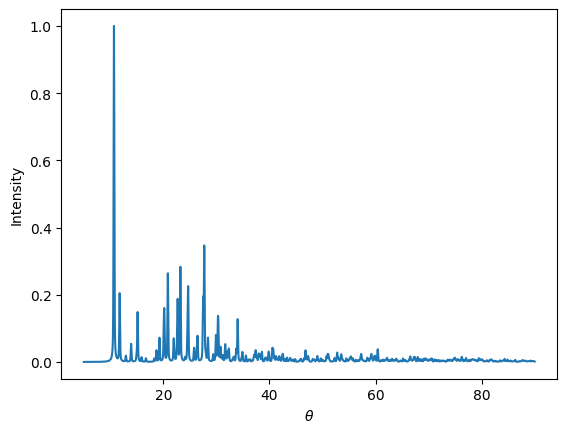

In [7]:
thetas = np.linspace(5, 90, 10824)

plt.figure()
plt.plot(thetas, powder_drx)
plt.xlabel('$\\theta$')
plt.ylabel('Intensity')
plt.show()

## Image Loading

To load an image associated to a structure, you need its ID. Let's see the simulated image associated to the structure we loaded previously.

In [8]:
ID = structure['ID']
image_path = os.path.join('Data', 'Powder_images', ID+'.png')
image = np.array(io.imread(image_path))
print(image.shape)

(521, 521)


The dimension of all the images is 521 x 521. Let's visualize the loaded image.

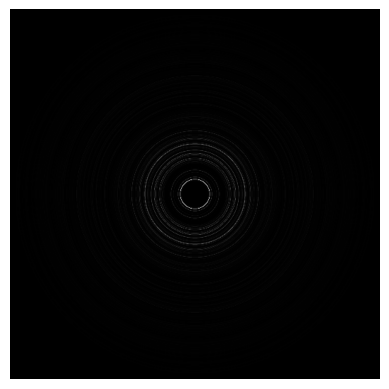

In [11]:
plt.figure()
plt.imshow(image, cmap ='gray')
plt.axis('off')
plt.show()

Great! Now you are able to use DRX-COD dataset.

## References

Vaitkus, A., Merkys, A., Sander, T., Quirós, M., Thiessen, P. A., Bolton, E. E. & Gražulis, S. (2023). A workflow for deriving chemical entities from crystallographic data and its application to the Crystallography Open Database. Journal of Cheminformatics, 15(1). https://doi.org/10.1186/s13321-023-00780-2.

Merkys, A.; Vaitkus, A.; Grybauskas, A.; Konovalovas, A.; Quirós, M. & Gražulis, S. "Graph isomorphism-based algorithm for cross-checking chemical and crystallographic descriptions". Journal of Cheminformatics, Springer Nature, 2023, 15.

Vaitkus, A., Merkys, A. & Gražulis, S. (2021). Validation of the Crystallography Open Database using the Crystallographic Information Framework. Journal of Applied Crystallography, 54(2), 661-672. https://doi.org/10.1107/S1600576720016532

Quirós, M.; Gražulis, S.; Girdzijauskaitė, S.; Merkys, A. & Vaitkus, A. "Using SMILES strings for the description of chemical connectivity in the Crystallography Open Database". Journal of Cheminformatics, Springer Nature, 2018, 10

Merkys, A.; Vaitkus, A.; Butkus, J.; Okulič-Kazarinas, M.; Kairys, V. & Gražulis, S. (2016) "COD::CIF::Parser: an error-correcting CIF parser for the Perl language". Journal of Applied Crystallography, 49.

Gražulis, S., Merkys, A., Vaitkus, A. & Okulič-Kazarinas, M. (2015) "Computing stoichiometric molecular composition from crystal structures". Journal of Applied Crystallography 48, 85-91.

Gražulis, S., Daškevič, A., Merkys, A., Chateigner, D., Lutterotti, L., Quirós, M., Serebryanaya, N. R., Moeck, P., Downs, R. T. & LeBail, A. (2012) "Crystallography Open Database (COD): an open-access collection of crystal structures and platform for world-wide collaboration". Nucleic Acids Research 40, D420-D427.

Grazulis, S., Chateigner, D., Downs, R. T., Yokochi, A.  T., Quiros, M., Lutterotti, L., Manakova, E., Butkus, J., Moeck, P. & Le Bail, A. (2009) "Crystallography Open Database - an open-access collection of crystal structures". J. Appl. Cryst. 42, 726-729.

Downs, R. T. & Hall-Wallace, M. (2003) "The American Mineralogist  Crystal Structure Database". American Mineralogist 88, 247-250.

Dan Porter, & Carmelo Prestipino. (2023). DanPorter/Dans_Diffraction: Version 3.0.0 (v3.0). Zenodo. https://doi.org/10.5281/zenodo.8106031

